## Loading,Inspecting Google Analytics Timeseries data


In [0]:
from time import sleep
import csv

import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
#source: https://www.analyticsvidya.com/blog/2018/09/non-stationary-time-series-python/

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [0]:
from google.colab import drive
import pandas as pd
import io
drive.mount('/content/gdrive')
from datetime import datetime


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#if we try to lazy in google analytics csv exports,we run into trouble
googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/us.csv')


In [0]:
#lets back up a step and print out the google analytics file,see if we can 
#locate the error.I am also goining to need to know how long the data is, as well

count = 0 
csvreader = csv.reader(open('/content/gdrive/My Drive/us.csv'))
for aline in csvreader:
  count += 1
  print(aline)
  print('%s lines of data' %count)

['# ----------------------------------------', '']
1 lines of data
['# All Web Site Data', '']
2 lines of data
['# Audience Overview', '']
3 lines of data
['# 20190815-20200328', '']
4 lines of data
['# ----------------------------------------', '']
5 lines of data
['', '']
6 lines of data
['Day Index', 'Num0fCase']
7 lines of data
['2020/1/22', '1']
8 lines of data
['2020/1/23', '1']
9 lines of data
['2020/1/24', '2']
10 lines of data
['2020/1/25', '2']
11 lines of data
['2020/1/26', '5']
12 lines of data
['2020/1/27', '5']
13 lines of data
['2020/1/28', '5']
14 lines of data
['2020/1/29', '5']
15 lines of data
['2020/1/30', '5']
16 lines of data
['2020/1/31', '7']
17 lines of data
['2020/2/1', '8']
18 lines of data
['2020/2/2', '8']
19 lines of data
['2020/2/3', '11']
20 lines of data
['2020/2/4', '11']
21 lines of data
['2020/2/5', '11']
22 lines of data
['2020/2/6', '11']
23 lines of data
['2020/2/7', '11']
24 lines of data
['2020/2/8', '11']
25 lines of data
['2020/2/9', '11']
26 

In [0]:
# we look through the docs for read_csv and find the "skip row" parameter

googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/us.csv',skiprows = [0,1,2,3,4,5])


In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,377288
76,2020/4/7,408787
77,2020/4/8,443586
78,2020/4/9,477754
79,2020/4/10,514956


In [0]:
# the data time for 'Day Index' is not a date time object!

googleanalyticsdata['Day Index'].describe()

count            80
unique           80
top       2020/1/29
freq              1
Name: Day Index, dtype: object

In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,377288
76,2020/4/7,408787
77,2020/4/8,443586
78,2020/4/9,477754
79,2020/4/10,514956


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83. Varies from 0 to 548.
print(googleanalyticsdata['Num0fCase'].describe())

count        80.000000
mean      59286.900000
std      126288.731035
min           1.000000
25%          11.750000
50%          45.000000
75%       27972.750000
max      514956.000000
Name: Num0fCase, dtype: float64


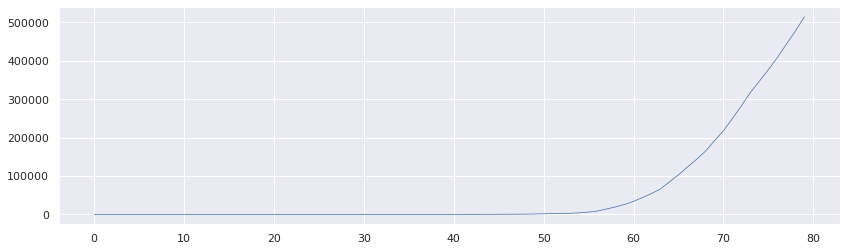

In [0]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14,4)})
googleanalyticsdata['Num0fCase'].plot(linewidth=0.75)

## Learning more about the time series(ADF/ACF/PACF)



In [0]:
adf_test(googleanalyticsdata['Num0fCase'])

Results of Dickey-Fuller Test:
Test Statistic                  1.796905
p-value                         0.998343
#Lags Used                     12.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


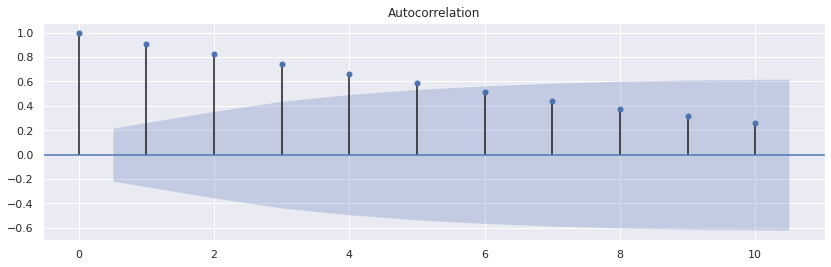

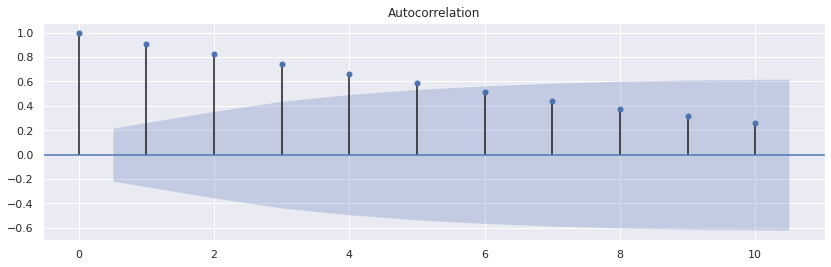

In [0]:
plot_acf(googleanalyticsdata['Num0fCase'],lags=10)

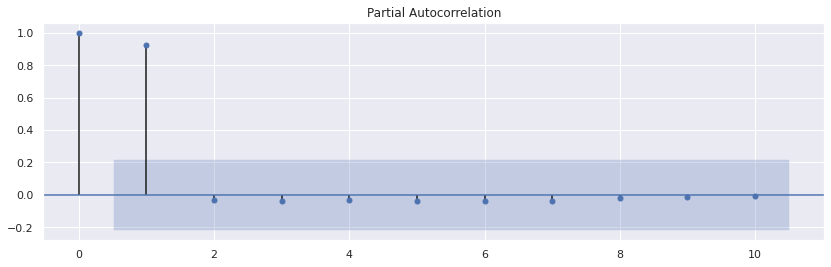

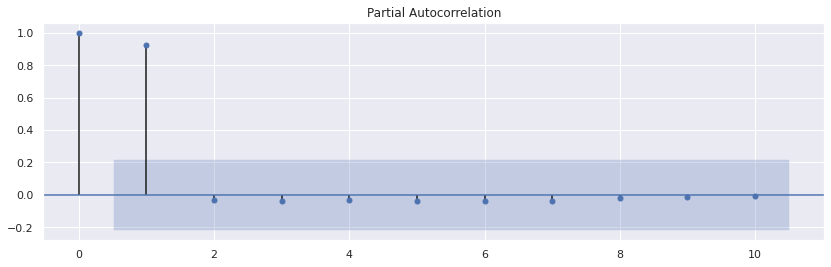

In [0]:
plot_pacf(googleanalyticsdata['Num0fCase'],lags=10)

## ARIMA Modeling

In [0]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

Taking the parameters we learned from ADF,ACF,and PACF, let's try a model

In [0]:
model = ARIMA(googleanalyticsdata["Num0fCase"],order=(1,2,1))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

                             ARIMA Model Results                              
Dep. Variable:           D2.Num0fCase   No. Observations:                   78
Model:                 ARIMA(1
 2
 1)   Log Likelihood                -854.292
Method:                       css-mle   S.D. of innovations          13815.061
Date:                Tue
 28 Apr 2020   AIC                           1716.584
Time:                        06:25:14   BIC                           1726.011
Sample:                             2   HQIC                          1720.358
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.421e+04        nan        nan        nan         nan         nan
ar.L1.D2.Num0fCase     1.0000        nan        nan        nan         nan         nan
ma.L1.D2.Num0fCase  

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



This is a pretty good model! I notice that the 7 day AR lag is not signofocant,and in general we only want to build models that don't have unsignificant lags.We can't avoid intermediary in significant lags,but we can nuke the training ones. So I'll change AR here to 6

In [0]:
model = ARIMA(googleanalyticsdata["Num0fCase"],order=(1,4,2))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

ValueError: ignored

In [0]:
model_fit.resid.head()

2   -14204.401928
3   -14206.625445
4   -14202.848993
5   -14209.072478
6   -14206.296057
dtype: float64

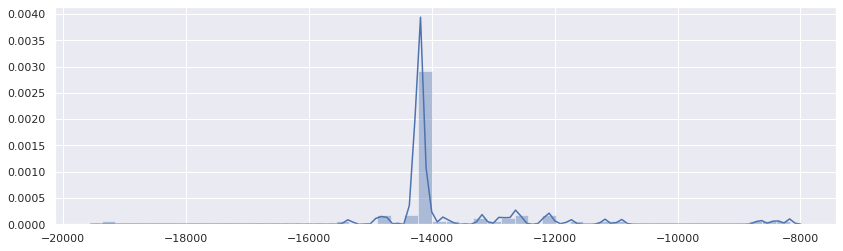

In [0]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals,hist=True,kde=True)

In [0]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))

[0.02204753]


It's always a good idea to inspect the distribution of the residuals(error).We're looking for a normal distribution.This suggests the model isn't biased in particular ways,eg,that it consistently under or over predicts.We want the error to be normal,nor biased.

Next,let's caculate a quick and diectly residual error.That is,how far off are we on a given prediction,on average?


In [0]:
#absolute value because we are not descriminating from being over or under on a prediction

absresiduals =abs(residuals)
print(np.mean(abs(residuals)))

0    13736.96274
dtype: float64


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83
#we can predict within a half of a standard deviation,good.Nor great.
print(googleanalyticsdata['Num0fCase'].describe())

count        80.000000
mean      59286.900000
std      126288.731035
min           1.000000
25%          11.750000
50%          45.000000
75%       27972.750000
max      514956.000000
Name: Num0fCase, dtype: float64


Finally,let's see how this thing actually does when we ask it to recreate timeseries with only the first value

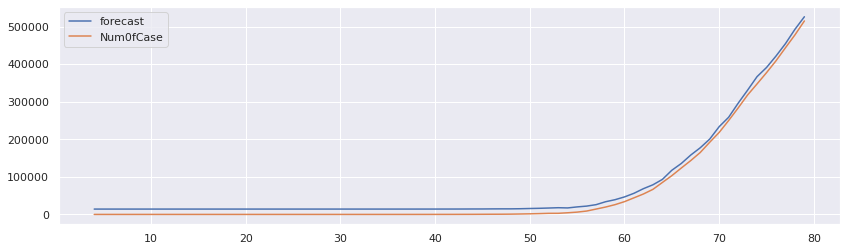

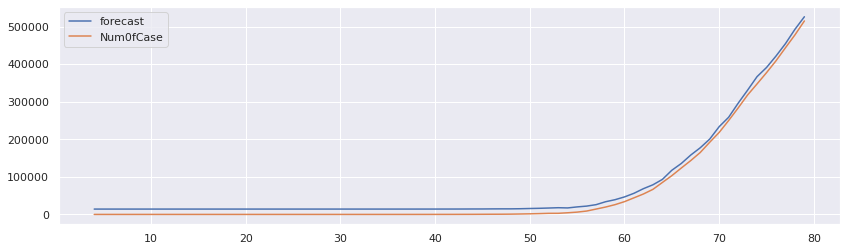

In [0]:
pd.plotting.register_matplotlib_converters()
model_fit.plot_predict()